In [1]:
# Retail Streaming Anomaly Detection
# Author: Sri Charan Konidina
# Date: October 13, 2025
# Goal: Simulate real-time retail sales data and detect anomalies as data streams in.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import time
from IPython.display import clear_output, display


In [3]:
# Simulate incoming retail sales data
np.random.seed(42)
days = np.arange(1, 51)
sales = np.random.normal(400, 50, size=50).astype(int)

# Introduce artificial anomalies
sales[[10, 25, 37, 45]] = [700, 800, 900, 1000]

df = pd.DataFrame({"day": days, "sales": sales})
df.head()


,day,sales
0,1,424
1,2,393
2,3,432
3,4,476
4,5,388


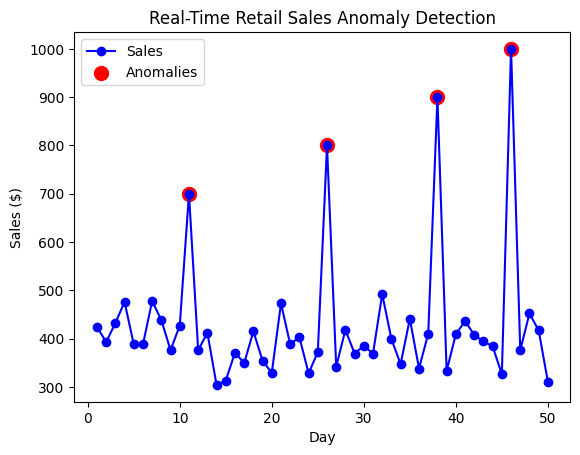

In [5]:
%matplotlib notebook
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

model = IsolationForest(contamination=0.08, random_state=42)
window = []

for i in range(len(df)):
    window.append(df.iloc[i])
    temp_df = pd.DataFrame(window)
    model.fit(temp_df[["sales"]])
    temp_df["anomaly"] = model.predict(temp_df[["sales"]])
    anomalies = temp_df[temp_df["anomaly"] == -1]

    clear_output(wait=True)
    plt.clf()  # Clear previous frame
    plt.title("Real-Time Retail Sales Anomaly Detection")
    plt.xlabel("Day")
    plt.ylabel("Sales ($)")
    plt.plot(temp_df["day"], temp_df["sales"], color='blue', marker='o', label="Sales")
    plt.scatter(anomalies["day"], anomalies["sales"], color='red', label="Anomalies", s=100)
    plt.legend()
    display(plt.gcf())
    time.sleep(0.5)

